IMPORTING LIBRARIES AND MODEL EVALUTION METRICES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


LOADING DATASET

In [8]:
import zipfile
zip_file_path = '/content/iris dataset.zip'
extracted_csv_path = '/content/csv_data_iris.csv'
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall('/content/')
df = pd.read_csv(extracted_csv_path)

EXPLORE THE DATA

In [10]:
print(df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target   class  
0       0  setosa  
1       0  setosa  
2       0  setosa  
3       0  setosa  
4       0  setosa  


In [11]:
print(df.describe)

<bound method NDFrame.describe of      sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
..                 ...               ...                ...               ...   
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1

In [12]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
 5   class              150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB
None


In [13]:
print(df.isnull().sum)

<bound method DataFrame.sum of      sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                False             False              False             False   
1                False             False              False             False   
2                False             False              False             False   
3                False             False              False             False   
4                False             False              False             False   
..                 ...               ...                ...               ...   
145              False             False              False             False   
146              False             False              False             False   
147              False             False              False             False   
148              False             False              False             False   
149              False             False              False             False 

TARGET AND VISUALIZE

target
0    50
1    50
2    50
Name: count, dtype: int64


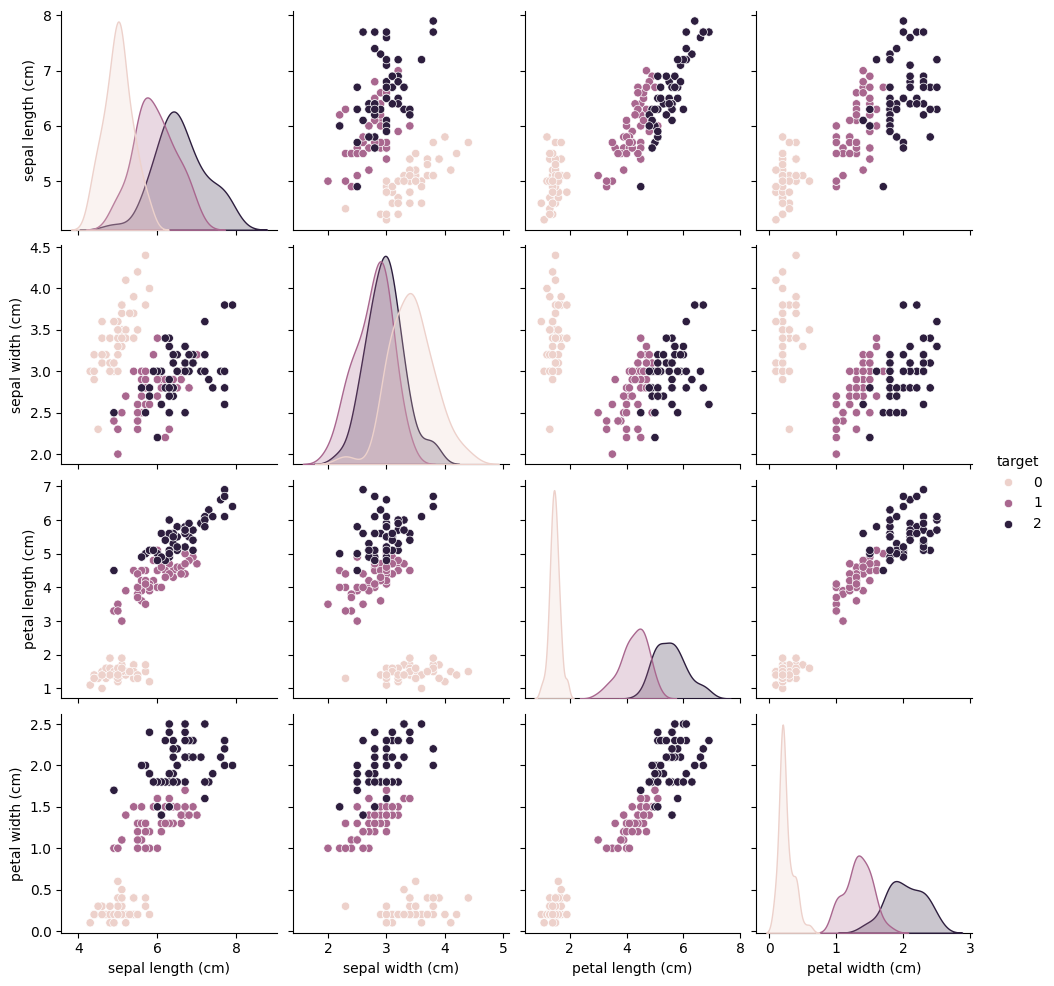

In [23]:
print(df['target'].value_counts())
sns.pairplot(df, hue='target')
plt.show()

SPLIT AND LABEL

In [27]:
X = df.drop(['target', 'class'], axis=1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Training samples:", len(X_train))
print("Testing samples:", len(X_test))

Training samples: 120
Testing samples: 30


TRAIN K-NEAREST NEIGHBOURS(KNN)

In [29]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print("KNN Accuracy:", accuracy_knn)


KNN Accuracy: 1.0


TRAIN DECISION TREE

In [31]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print("Decision Tree Accuracy:", accuracy_dt)


Decision Tree Accuracy: 1.0


TRAIN LOGISTIC REGRESSION

In [33]:
lr = LogisticRegression(max_iter=200)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print("Logistic Regression Accuracy:", accuracy_lr)


Logistic Regression Accuracy: 1.0


MODEL COMPARISON

In [34]:
print("Model Comparison:")
print(f"KNN Accuracy: {accuracy_knn:.2f}")
print(f"Decision Tree Accuracy: {accuracy_dt:.2f}")
print(f"Logistic Regression Accuracy: {accuracy_lr:.2f}")


Model Comparison:
KNN Accuracy: 1.00
Decision Tree Accuracy: 1.00
Logistic Regression Accuracy: 1.00


CONFUSION MATRIX

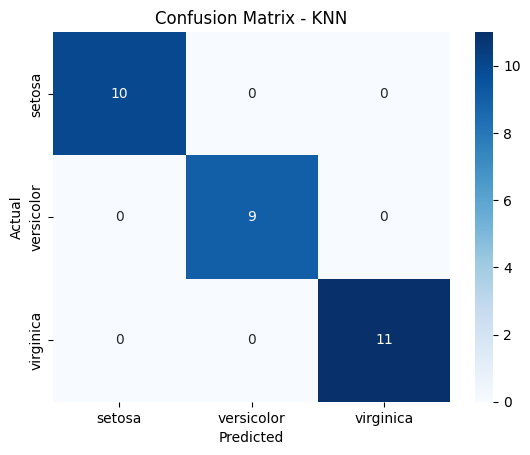

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [37]:
target_names = df['class'].unique()
cm = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - KNN')
plt.show()
print(classification_report(y_test, y_pred_knn, target_names=target_names))

PAIRPLOT BY SPECIES

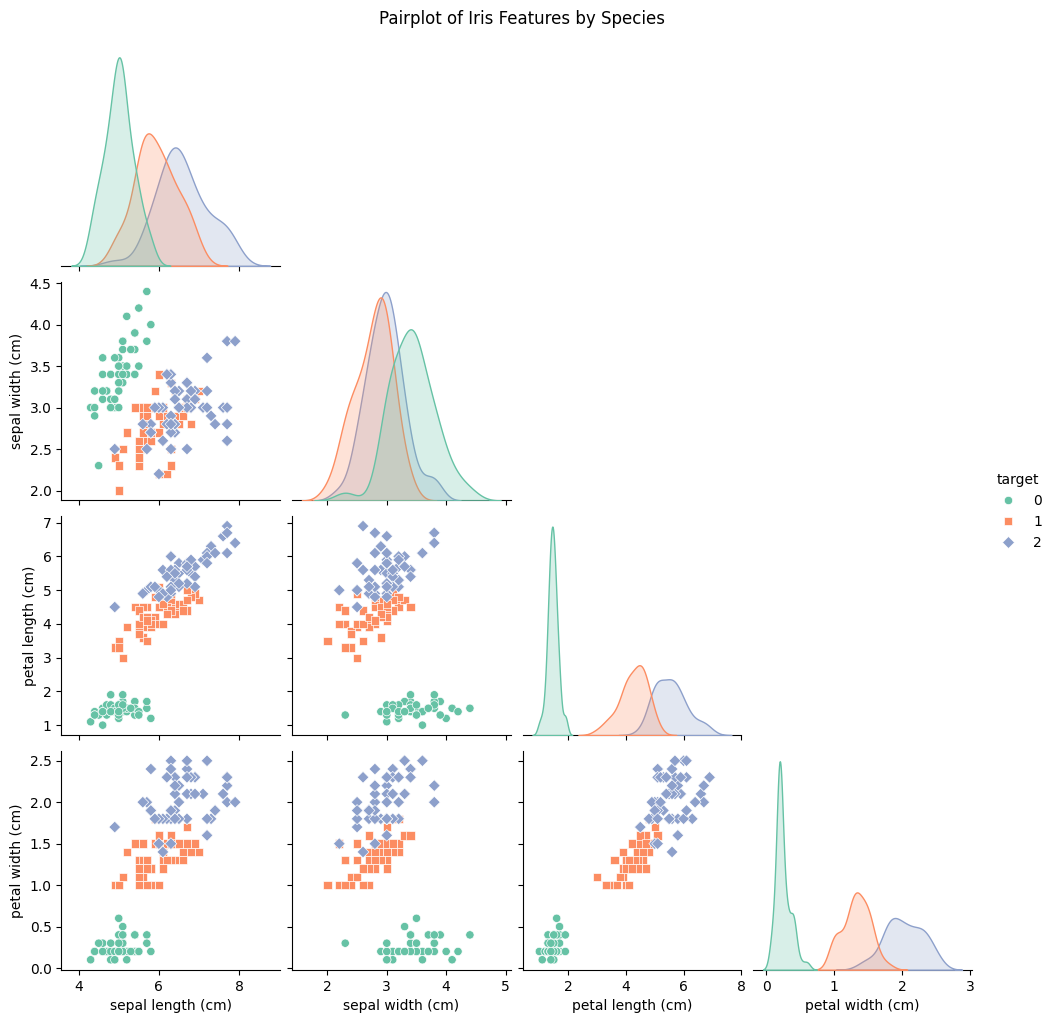

In [39]:
sns.pairplot(df, hue='target', palette='Set2', markers=["o", "s", "D"], corner=True)
plt.suptitle("Pairplot of Iris Features by Species", y=1.02)
plt.show()